# Análise Exploratória de Dados com Python

* ## Análise exploratória

* ## Cota para o Exercício da Atividade Parlamentar *(CEAP)*  

**CEAP** é uma cota única mensal destinada a custear os gastos dos deputados exclusivamente vinculados ao exercício da atividade parlamentar. Existe um conjunto de regras que define quais atividades podem ser indenizadas, como passagens aéreas, telefonia, alimentação, hospedagem, locação de veículos, combustíveis, cursos, paletras, entre outros.   

O valor limite do CEAP depende da federação que o deputado representa. Essa variação ocorre devido ao valor da passagem aérea entre a Brasília e a federação.

<img align="center" width="600" height="200" src="img/limitesCEAP.png">


**Fonte:** [Informações e legislação sobre as cotas para o exercício da atividade parlamentar.](https://www2.camara.leg.br/transparencia/acesso-a-informacao/copy_of_perguntas-frequentes/cota-para-o-exercicio-da-atividade-parlamentar)

## Conjunto de Dados: CEAP 2017  
[**Link para download**](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/dados-abertos-cota-parlamentar)
## Atributos:
* **txNomeParlamentar:** Nome do parlamentar;
* **sgUF:** Sigla da federação que o parlamentar representa;
* **sgPartido:** Sigla do partido;
* **txtDescricao:** Descrição do tipo de despesa;
* **vlrLiquido:** O valor que será reembolsado para o parlamentar;
* **numMes:** Mês do reembolso;
* **numAno:** Ano do reembolso.

**Fonte:** [Descrição de todos atributos.](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/explicacoes-sobre-o-formato-dos-arquivos-xml)

### Bibliotecas

In [22]:
import calendar
import warnings
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

#plt.rc('figure', figsize=(12,8))
sns.set(font_scale=1.3, rc={"figure.figsize": [12, 8]})
warnings.filterwarnings('ignore')

## Tratamento dos Dados

#### Lendo os dados com [pd.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [23]:
ceap_2017 = pd.read_csv('Datasets/Ano-2017.csv', delimiter=';')

#### Obtendo as dimensões com o atributo [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html?highlight=shape#pandas.DataFrame.shape)

In [24]:
#O atributo shape irá nos retornar as dimensões do nosso conjunto de dados
ceap_2017.shape

(367714, 31)

In [25]:
#O atributo columns irá as colunas presente em nosso conjunto de dados
ceap_2017.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

In [26]:
#Lista de colunas que serão utilizadas para análise
colunas = ['txNomeParlamentar', 'sgUF', 'sgPartido','txtDescricao', 'vlrLiquido', 'numMes', 'numAno']

In [27]:
#Obtendo dataframe apenas com as colunas desejadas
ceap = ceap_2017[colunas]

In [28]:
#Obtendo os 10 primeiros registros
ceap.head(10)

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,vlrLiquido,numMes,numAno
0,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,271.79,7,2017
1,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,63.30,10,2017
2,LID.GOV-CD,NaN,NaN,PASSAGEM AÉREA - REEMBOLSO,1509.80,7,2017
3,LID.GOV-CD,NaN,NaN,PASSAGEM AÉREA - REEMBOLSO,1872.69,7,2017
4,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,216.31,8,2017
5,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,101.00,10,2017
6,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,127.47,5,2017
7,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,307.79,11,2017
8,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,251.30,7,2017
9,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,159.13,10,2017


#### Renomeando as colunas

In [29]:
ceap.columns

Index(['txNomeParlamentar', 'sgUF', 'sgPartido', 'txtDescricao', 'vlrLiquido',
       'numMes', 'numAno'],
      dtype='object')

In [30]:
novas_colunas = ['nome_parlamentar', 'estado', 'partido', 'descricao_despesa', 'valor_despesa', 'mes_despesa', 'ano_despesa']

In [31]:
ceap.columns = novas_colunas

In [32]:
ceap.columns

Index(['nome_parlamentar', 'estado', 'partido', 'descricao_despesa',
       'valor_despesa', 'mes_despesa', 'ano_despesa'],
      dtype='object')

#### Obtendo os valores únicos de um atributo

In [33]:
ceap['partido'].unique()

array([nan, 'AVANTE', 'PSDB', 'MDB', 'DEM', 'PP', 'PSC', 'PODE', 'PSB',
       'PT', 'PRB', 'PTB', 'PPS', 'PDT', 'PSOL', 'PV', 'SOLIDARIEDADE',
       'PSD', 'PR', 'PCdoB', 'PSL', 'PROS', 'REDE', 'PATRI', 'PHS', 'PPL'],
      dtype=object)

#### Convertendo valor numérico referente ao mês em texto

In [35]:
def convert_mes(num_mes):
    return calendar.month_name[num_mes]

In [36]:
ceap['mes_despesa'] = ceap['mes_despesa'].apply(convert_mes)

In [37]:
ceap['mes_despesa'].unique()

array(['July', 'October', 'August', 'May', 'November', 'September',
       'June', 'December', 'February', 'April', 'March', 'January'],
      dtype=object)

#### Formatando os nomes dos parlamentares

In [83]:
ceap['nome_parlamentar'].unique()[20:30]

array(['Felipe Carreras', 'Celso Pansera', 'Simão Sessim',
       'Arlindo Chinaglia', 'Arnaldo Faria De Sá', 'Beto Mansur',
       'Celso Russomanno', 'Alex Canziani', 'Osmar Serraglio',
       'Rubens Bueno'], dtype=object)

In [84]:
def convert_nome(nome):
    return nome.title()

In [85]:
ceap['nome_parlamentar'] = ceap['nome_parlamentar'].apply(convert_nome)

In [86]:
ceap['nome_parlamentar'].unique()[20:30]

array(['Felipe Carreras', 'Celso Pansera', 'Simão Sessim',
       'Arlindo Chinaglia', 'Arnaldo Faria De Sá', 'Beto Mansur',
       'Celso Russomanno', 'Alex Canziani', 'Osmar Serraglio',
       'Rubens Bueno'], dtype=object)

## Análise Exploratória

* ### Quais partidos fizeram mais solicitações de reembolso?

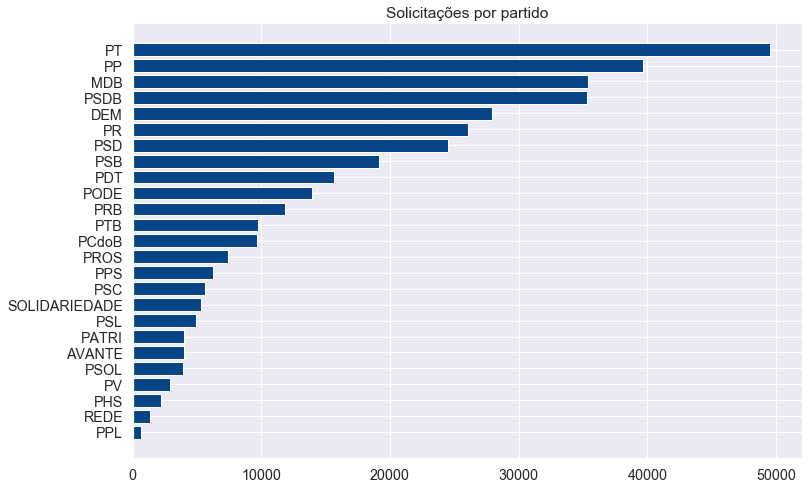

In [87]:
solicitacoes_partido = ceap['partido'].value_counts()
plt.barh(solicitacoes_partido.index, solicitacoes_partido.values, color='#084586')
plt.title("Solicitações por partido")
plt.gca().invert_yaxis();

* ### Quais partidos tem mais representantes?

In [88]:
representantes_partido = ceap.groupby('partido')['nome_parlamentar'].unique().agg(len).sort_values(ascending=False)

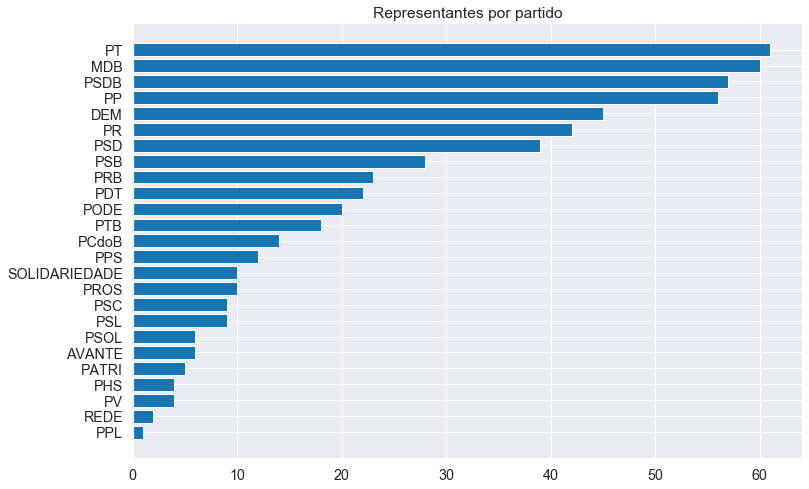

In [90]:
plt.barh(representantes_partido.index, representantes_partido.values, color='#1576B3')
plt.title("Representantes por partido")
plt.gca().invert_yaxis(); 

* ### Quais partidos possuem as maiores médias de gasto?

In [91]:
gasto_partido = ceap.groupby('partido')['valor_despesa'].sum()

In [92]:
media_gasto = (gasto_partido / representantes_partido).sort_values(ascending=False)

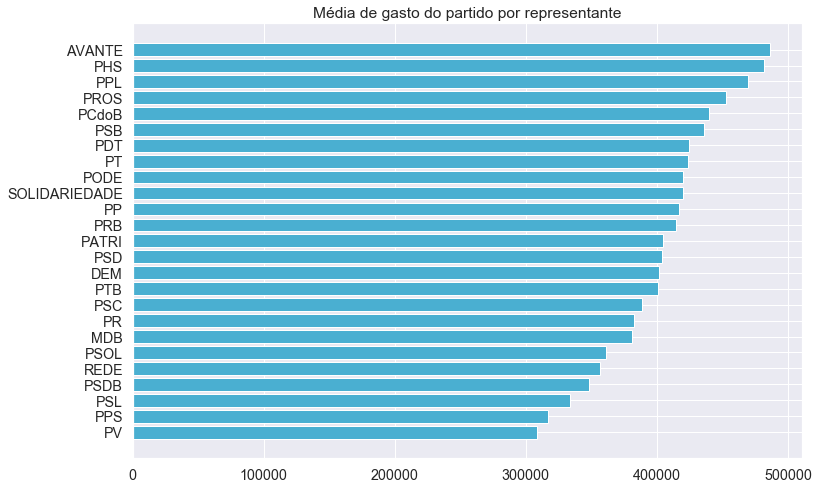

In [93]:
plt.barh(media_gasto.index, media_gasto.values, color='#4AAFD1')
plt.title("Média de gasto do partido por representante")
plt.gca().invert_yaxis(); 

* ### Quais parlamentares gastaram mais ao longo do ano de 2017?

In [94]:
ceap.groupby('nome_parlamentar')['valor_despesa'].sum().sort_values(ascending=False).head(10)

nome_parlamentar
Rocha                590760.23
Remídio Monai        577421.87
Edio Lopes           556688.40
Maria Helena         555898.83
Jhonatan De Jesus    554722.62
Hiran Gonçalves      546148.11
Carlos Andrade       545474.57
Rômulo Gouveia       541454.14
Alan Rick            537890.73
Leo De Brito         537859.25
Name: valor_despesa, dtype: float64

In [95]:
ceap[ceap['nome_parlamentar'] == 'Rocha']

,nome_parlamentar,estado,partido,descricao_despesa,valor_despesa,mes_despesa,ano_despesa
253560,Rocha,AC,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,112.50,September,2017
253561,Rocha,AC,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,204.50,September,2017
253562,Rocha,AC,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,203.00,November,2017
253563,Rocha,AC,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,294.50,December,2017
253564,Rocha,AC,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,312.00,August,2017
...,...,...,...,...,...,...,...
254161,Rocha,AC,PSDB,PASSAGEM AÉREA - RPA,797.69,April,2017
254162,Rocha,AC,PSDB,PASSAGEM AÉREA - RPA,1359.90,April,2017
254163,Rocha,AC,PSDB,PASSAGEM AÉREA - RPA,556.69,May,2017
254164,Rocha,AC,PSDB,PASSAGEM AÉREA - RPA,2170.69,July,2017


* ### Quais parlamentares ultrapassaram o teto de gastos?

In [96]:
solicitacoes_parlamentar = ceap.groupby('nome_parlamentar')['valor_despesa'].max().sort_values(ascending=False)

In [97]:
solicitacoes_parlamentar[solicitacoes_parlamentar.values > 40000]

nome_parlamentar
Givaldo Carimbão                     155000.0
Pedro Vilela                         149800.0
Arlindo Chinaglia                    117600.0
Professora Dorinha Seabra Rezende    104895.0
Givaldo Vieira                        89492.0
Arthur Lira                           86000.0
Hermes Parcianello                    80677.0
Daniel Coelho                         80010.0
Gonzaga Patriota                      79900.0
Pr. Marco Feliciano                   75000.0
Carlos Manato                         72000.0
Ricardo Izar                          67480.0
Reginaldo Lopes                       65600.0
Márcio Marinho                        65000.0
Pastor Eurico                         60800.0
Jhonatan De Jesus                     60000.0
Macedo                                60000.0
Félix Mendonça Júnior                 60000.0
Antonio Bulhões                       59760.0
Valtenir Pereira                      59000.0
Gilberto Nascimento                   59000.0
Danilo Cabral    

* ### Quais são as maiores despesas dos parlamentares?

In [98]:
despesa = ceap.groupby('descricao_despesa')['valor_despesa'].sum().sort_values(ascending=False).round().head(10)

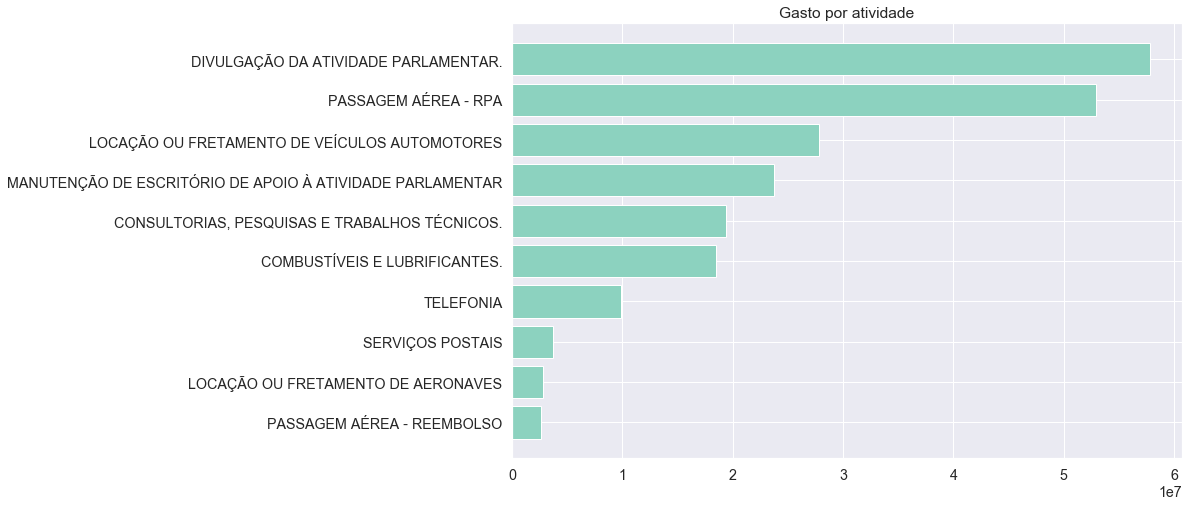

In [99]:
plt.barh(despesa.index, despesa.values, color='#8CD2BF')
plt.title("Gasto por atividade")
plt.gca().invert_yaxis();

* ### Quais estados possuem as maiores despesas?

In [100]:
despesa_estado = ceap.groupby('estado')['valor_despesa'].count().sort_values(ascending=False)

In [101]:
states = gpd.read_file("bcim_2016_21_11_2018.gpkg", layer="lim_unidade_federacao_a")

Estado: Mato Grosso do Sul


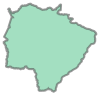

In [102]:
print('Estado: ' + states.nome[1])
states.geometry[1]

In [103]:
states.rename({'sigla':'estado'}, axis=1, inplace=True)
mapa_estados = states.merge(despesa_estado, on='estado', how="left")

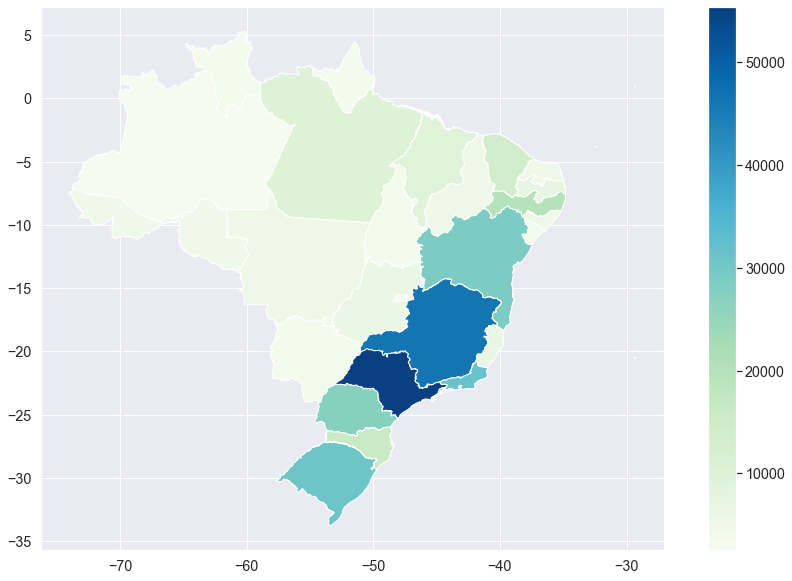

In [104]:
mapa_estados[['estado', 'valor_despesa', 'geometry']]
mapa_estados.plot(column="valor_despesa", cmap="GnBu", figsize=(16,10), legend=True);

## Materias  

### Deseja aprender programação?
* [Python para zumbis](https://www.pycursos.com/python-para-zumbis/)
* [Introdução à Programação com Python](https://www.amazon.com.br/Introdu%C3%A7%C3%A3o-%C3%A0-Programa%C3%A7%C3%A3o-com-Python/dp/8575227181/ref=as_li_ss_tl?ie=UTF8&qid=1547801628&sr=8-1&keywords=nilo+ney+coutinho&linkCode=sl1&tag=livropython-20&linkId=d945781d420befb81bb935576479889a&language=pt_BR)

### Deseja aprender como manipular dados com python?
* [Python Fundamentos para Análise de Dados](https://www.datascienceacademy.com.br/pages/curso-python-fundamentos-para-analise-de-dados)
* [Começando com Pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)

### Deseja aprimorar seus conhecimentos em manipulação e visualização de dados? 
* [Python para Análise de Dados](https://www.amazon.com.br/Python-Para-An%C3%A1lise-Dados-Tratamento/dp/8575226479/ref=sr_1_1?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=363X83W4WA21E&dchild=1&keywords=python+para+analise+de+dados&qid=1599689580&sprefix=python+para+an%2Caps%2C281&sr=8-1)
* [Storytelling com Dados](https://www.amazon.com.br/Storytelling-com-Dados-Visualiza%C3%A7%C3%A3o-Profissionais/dp/8550804681/ref=sr_1_1?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=49NHXA09FNU7&dchild=1&keywords=storytelling+com+dados&qid=1599689656&sprefix=story%2Caps%2C320&sr=8-1)

### Está procurando dados para analisar?
* [Kaggle](https://www.kaggle.com/datasets)
* [Portal Brasileiro de Dados Abertos](http://dados.gov.br/)

### Projeto para se inspirar
* [Operação Serenata de Amor](https://serenata.ai/)

### Precisa de ajuda?
* [LinkedIn](https://www.linkedin.com/in/bruno-dorneles/)